In [ ]:
 pip install lightgbm catboost xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             median_absolute_error)

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor  # Sudah ada sekarang


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/skripsi/data_sampah.csv')
df_data.head(50)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,Johar Baru,Jakarta Pusat,464,m,1,4
1,1,Kali / Sungai Sentiong - Ruas Abapon,Johar Baru,Jakarta Pusat,464,m,1,4
2,1,Kali / Sungai Sentiong - JL Tanah Tinggi,Johar Baru,Jakarta Pusat,464,m,1,4
3,1,Kali / Sungai Sentiong Jl.Galur - Pombensin,Johar Baru,Jakarta Pusat,606,m,1,4
4,1,Kali / Sungai Sentiong - Jl. Timah,Johar Baru,Jakarta Pusat,310,m,1,7
5,1,PHB Kawi Kawi Bawah,Johar Baru,Jakarta Pusat,620,m,1,1
6,1,PHB Kayu Awet,Johar Baru,Jakarta Pusat,300,m,1,12
7,1,PHB Pulo Gundul,Johar Baru,Jakarta Pusat,500,m,1,1
8,1,PHB Tanah Tinggi XII,Johar Baru,Jakarta Pusat,500,m,1,1
9,1,PHB Bala Dewa,Johar Baru,Jakarta Pusat,330,m,1,1


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      54343 non-null  int64 
 1    titik_lokasi              54343 non-null  object
 2    kecamatan                 54343 non-null  object
 3    wilayah                   54343 non-null  object
 4    panjang/luas              53475 non-null  object
 5   satuan_panjang/luas        32388 non-null  object
 6   tanggal                    54343 non-null  int64 
 7   volume_sampah_perhari(m3)  54343 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
# Sebelum rename kolom
print("Sebelum Rename:")
print(df_data.columns)

# Rename kolom (hapus spasi)
df_data.columns = df_data.columns.str.strip()

# Sesudah rename kolom
print("\nSesudah Rename:")
print(df_data.columns)

Sebelum Rename:
Index(['bulan', ' titik_lokasi', ' kecamatan', ' wilayah', ' panjang/luas',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

Sesudah Rename:
Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')


In [ ]:
df_data['volume_sampah_perhari(m3)'].describe()

,volume_sampah_perhari(m3)
count,54343
unique,58
top,-
freq,15649


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      54343 non-null  int64 
 1   titik_lokasi               54343 non-null  object
 2   kecamatan                  54343 non-null  object
 3   wilayah                    54343 non-null  object
 4   panjang/luas               53475 non-null  object
 5   satuan_panjang/luas        32388 non-null  object
 6   tanggal                    54343 non-null  int64 
 7   volume_sampah_perhari(m3)  54343 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
df_data['panjang/luas'] = pd.to_numeric(df_data['panjang/luas'], errors='coerce')
df_data['volume_sampah_perhari(m3)'] = pd.to_numeric(df_data['volume_sampah_perhari(m3)'], errors='coerce')

In [ ]:
df_data.describe()

,bulan,panjang/luas,tanggal,volume_sampah_perhari(m3)
count,54343.0,41044.000000,54343.000000,36640.000000
mean,1.0,967.604040,16.000000,4.111940
std,0.0,1609.163255,8.944354,5.358695
min,1.0,0.087500,1.000000,0.000000
25%,1.0,500.000000,8.000000,0.000000
50%,1.0,719.000000,16.000000,1.000000
75%,1.0,1000.000000,24.000000,12.000000
max,1.0,36800.000000,31.000000,152.000000


In [ ]:
df_data.duplicated().sum()

np.int64(0)

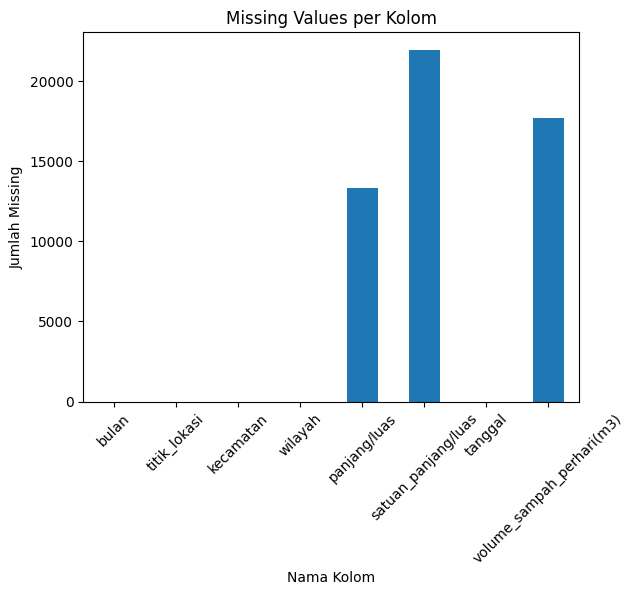

In [ ]:
df_data.isnull().sum().plot(kind='bar')
plt.title('Missing Values per Kolom')
plt.ylabel('Jumlah Missing')
plt.xlabel('Nama Kolom')
plt.xticks(rotation=45)
plt.show()


cleaning

In [ ]:
df_data.isna().sum()


,0
bulan,0
titik_lokasi,0
kecamatan,0
wilayah,0
panjang/luas,13299
satuan_panjang/luas,21955
tanggal,0
volume_sampah_perhari(m3),17703


In [ ]:

df_data = df_data.drop(columns=['satuan_panjang/luas'], errors='ignore')

In [ ]:
df_data[df_data['panjang/luas'].isna()]

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,tanggal,volume_sampah_perhari(m3)
71,1,Saringan P2SC. UPK BADAN AIR,Kemayoran,Jakarta Pusat,NaN,1,2.0
87,1,Saringan Sumenep. UPK BADAN AIR,Menteng,Jakarta Pusat,NaN,1,1.0
152,1,Kali BKT Marunda Pintu Air Sekatan 1,Cilincing,Jakarta Utara,NaN,1,6.0
153,1,Kali BKT Marunda Pintu Air Sekatan 2,Cilincing,Jakarta Utara,NaN,1,6.0
154,1,Kali Cakung Drain Sekatan 1,Cilincing,Jakarta Utara,NaN,1,0.0
...,...,...,...,...,...,...,...
54107,1,Saringan Meh Hek UPK Badan Air,Kramat Jati,Jakarta Timur,NaN,31,24.0
54108,1,Saringan Meh Cawang UPK Badan Air,Kramat Jati,Jakarta Timur,NaN,31,10.0
54109,1,Saringan Jagorawi UPK Badan Air,Kramat Jati,Jakarta Timur,NaN,31,NaN
54110,1,Saringan Meh PGC UPK Badan Air,Kramat Jati,Jakarta Timur,NaN,31,16.0


In [ ]:
df_data['panjang/luas'] = df_data['panjang/luas'].fillna(df_data['panjang/luas'].median())

In [ ]:
df_data[df_data['panjang/luas'].isna()]

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,tanggal,volume_sampah_perhari(m3)


In [ ]:
df_data['volume_sampah_perhari(m3)'].interpolate(method='linear', inplace=True)

/tmp/ipython-input-319824444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['volume_sampah_perhari(m3)'].interpolate(method='linear', inplace=True)


In [ ]:
df_data.isna().sum()

,0
bulan,0
titik_lokasi,0
kecamatan,0
wilayah,0
panjang/luas,0
tanggal,0
volume_sampah_perhari(m3),0


In [ ]:
df_data.duplicated().sum()

np.int64(0)

In [ ]:
df_data['tahun'] = 2022

In [ ]:
df_data['wilayah'] = df_data['wilayah'].str.lower().str.strip()
df_data['kecamatan'] = df_data['kecamatan'].str.lower().str.strip()

In [ ]:
df_data

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,tanggal,volume_sampah_perhari(m3),tahun
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,johar baru,jakarta pusat,464.0,1,4.0,2022
1,1,Kali / Sungai Sentiong - Ruas Abapon,johar baru,jakarta pusat,464.0,1,4.0,2022
2,1,Kali / Sungai Sentiong - JL Tanah Tinggi,johar baru,jakarta pusat,464.0,1,4.0,2022
3,1,Kali / Sungai Sentiong Jl.Galur - Pombensin,johar baru,jakarta pusat,606.0,1,4.0,2022
4,1,Kali / Sungai Sentiong - Jl. Timah,johar baru,jakarta pusat,310.0,1,7.0,2022
...,...,...,...,...,...,...,...,...
54338,1,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,cakung,jakarta timur,800.0,31,1.6,2022
54339,1,PHB Rawa Teratai,cakung,jakarta timur,700.0,31,1.7,2022
54340,1,PHB Rawa Gelam III,cakung,jakarta timur,1000.0,31,1.8,2022
54341,1,PHB Metropos KIP,cakung,jakarta timur,1000.0,31,1.9,2022


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bulan                      54343 non-null  int64  
 1   titik_lokasi               54343 non-null  object 
 2   kecamatan                  54343 non-null  object 
 3   wilayah                    54343 non-null  object 
 4   panjang/luas               54343 non-null  float64
 5   tanggal                    54343 non-null  int64  
 6   volume_sampah_perhari(m3)  54343 non-null  float64
 7   tahun                      54343 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.3+ MB




---



---



EKSPLORASI DATA DF PENDUDUK

In [ ]:
df_penduduk = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/skripsi/kepadatan_penduduk.xlsx')
df_penduduk.head(30)

,periode_data,kota_kabupaten,kecamatan,kelurahan,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,2022,JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,"17,827","1,560"
1,2022,JAKARTA UTARA,PENJARINGAN,KAPUK MUARA,"46,979","5,117"
2,2022,JAKARTA UTARA,PENJARINGAN,PEJAGALAN,"91,307","24,521"
3,2022,JAKARTA UTARA,PENJARINGAN,PLUIT,"59,142","7,566"
4,2022,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,"43,670","11,598"
5,2022,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,"80,289","15,393"
6,2022,JAKARTA UTARA,TANJUNG PRIOK,PAPANGGO,"50,552","16,490"
7,2022,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,"37,643","16,009"
8,2022,JAKARTA UTARA,TANJUNG PRIOK,KEBON BAWANG,"64,198","36,679"
9,2022,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,"88,809","16,646"


In [ ]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   periode_data             267 non-null    int64 
 1   kota_kabupaten           267 non-null    object
 2   kecamatan                267 non-null    object
 3   kelurahan                267 non-null    object
 4   jumlah_penduduk_wni_wna  267 non-null    object
 5   jumlah_kepadatan         267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


In [ ]:
df_penduduk['jumlah_kepadatan'] = df_penduduk['jumlah_kepadatan'].str.replace(',', '').astype(int)
df_penduduk['jumlah_penduduk_wni_wna']= df_penduduk['jumlah_penduduk_wni_wna'].str.replace(',', '').astype(int)

In [ ]:
df_penduduk.describe()

,periode_data,jumlah_penduduk_wni_wna,jumlah_kepadatan
count,267.0,267.000000,267.000000
mean,2022.0,42426.359551,23746.411985
std,0.0,26236.772499,16191.284443
min,2022.0,2647.000000,578.000000
25%,2022.0,25469.000000,13199.000000
50%,2022.0,37965.000000,18578.000000
75%,2022.0,53618.000000,30598.500000
max,2022.0,174497.000000,95652.000000


In [ ]:

df_penduduk.isna().sum()

,0
periode_data,0
kota_kabupaten,0
kecamatan,0
kelurahan,0
jumlah_penduduk_wni_wna,0
jumlah_kepadatan,0


In [ ]:
df_penduduk.duplicated().sum()

np.int64(0)

**DATA CLEANING DF PENDUDUK**

In [ ]:
df_penduduk.columns = df_penduduk.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df_penduduk.head()

,periode_data,kota_kabupaten,kecamatan,kelurahan,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,2022,JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,17827,1560
1,2022,JAKARTA UTARA,PENJARINGAN,KAPUK MUARA,46979,5117
2,2022,JAKARTA UTARA,PENJARINGAN,PEJAGALAN,91307,24521
3,2022,JAKARTA UTARA,PENJARINGAN,PLUIT,59142,7566
4,2022,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43670,11598


In [ ]:
# --- PREPROCESS DATA PENDUDUK ---

df_penduduk['kecamatan'] = df_penduduk['kecamatan'].str.lower().str.strip()
df_penduduk['kelurahan'] = df_penduduk['kelurahan'].str.lower().str.strip()
df_penduduk['kota_kabupaten'] = df_penduduk['kota_kabupaten'].str.lower().str.strip()

for col in ['jumlah_penduduk_wni_wna', 'jumlah_kepadatan']:
    df_penduduk[col] = pd.to_numeric(
        df_penduduk[col].astype(str).str.replace(",", ""), errors="coerce"
    ).fillna(0).astype(int)

df_penduduk.head()

,periode_data,kota_kabupaten,kecamatan,kelurahan,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,2022,jakarta utara,penjaringan,kamal muara,17827,1560
1,2022,jakarta utara,penjaringan,kapuk muara,46979,5117
2,2022,jakarta utara,penjaringan,pejagalan,91307,24521
3,2022,jakarta utara,penjaringan,pluit,59142,7566
4,2022,jakarta utara,tanjung priok,tanjung priok,43670,11598


In [ ]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   periode_data             267 non-null    int64 
 1   kota_kabupaten           267 non-null    object
 2   kecamatan                267 non-null    object
 3   kelurahan                267 non-null    object
 4   jumlah_penduduk_wni_wna  267 non-null    int64 
 5   jumlah_kepadatan         267 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 12.6+ KB


In [ ]:
def clean_text(x):
    if isinstance(x, str):
        return x.strip().upper().replace("KOTA ADM. ", "").replace("KAB.ADM.", "").replace("DKI ", "")
    return x

df_data['wilayah'] = df_data['wilayah'].apply(clean_text)
df_data['kecamatan'] = df_data['kecamatan'].apply(clean_text)

df_penduduk['kota_kabupaten'] = df_penduduk['kota_kabupaten'].apply(clean_text)
df_penduduk['kecamatan'] = df_penduduk['kecamatan'].apply(clean_text)


In [ ]:

mapping_kecamatan = {
    "TAMANSARI": "TAMAN SARI",
    "KALIDERES": "KALI DERES",
    "SETIABUDI": "SETIA BUDI"
}

df_data['kecamatan'] = df_data['kecamatan'].replace(mapping_kecamatan)


In [ ]:
df_penduduk

,periode_data,kota_kabupaten,kecamatan,kelurahan,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,2022,JAKARTA UTARA,PENJARINGAN,kamal muara,17827,1560
1,2022,JAKARTA UTARA,PENJARINGAN,kapuk muara,46979,5117
2,2022,JAKARTA UTARA,PENJARINGAN,pejagalan,91307,24521
3,2022,JAKARTA UTARA,PENJARINGAN,pluit,59142,7566
4,2022,JAKARTA UTARA,TANJUNG PRIOK,tanjung priok,43670,11598
...,...,...,...,...,...,...
262,2022,JAKARTA TIMUR,CIPAYUNG,munjul,31313,15124
263,2022,JAKARTA TIMUR,CIPAYUNG,setu,27197,9242
264,2022,JAKARTA TIMUR,CIPAYUNG,bambu apus,34197,11096
265,2022,JAKARTA TIMUR,CIPAYUNG,lubang buaya,82660,22276


In [ ]:
# Agregasi per kecamatan
df_penduduk_kec = df_penduduk.groupby('kecamatan').agg({
    'jumlah_penduduk_wni_wna': 'sum',
    'jumlah_kepadatan': 'mean'
}).reset_index()

df_penduduk_kec.head()

,kecamatan,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,CAKUNG,591513,14733.571429
1,CEMPAKA PUTIH,98714,22885.000000
2,CENGKARENG,590335,21812.500000
3,CILANDAK,229571,13662.000000
4,CILINCING,453027,14860.142857


# **merger**

In [ ]:
df = df_data.merge(
    df_penduduk,
    left_on=['wilayah','kecamatan'],
    right_on=['kota_kabupaten','kecamatan'],
    how='left'
)
df.head()


,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,tanggal,volume_sampah_perhari(m3),tahun,periode_data,kota_kabupaten,kelurahan,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,2022,JAKARTA PUSAT,johar baru,45032,38142
1,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,2022,JAKARTA PUSAT,kampung rawa,26440,91155
2,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,2022,JAKARTA PUSAT,galur,22013,75900
3,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,2022,JAKARTA PUSAT,tanah tinggi,46980,74538
4,1,Kali / Sungai Sentiong - Ruas Abapon,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,2022,JAKARTA PUSAT,johar baru,45032,38142


In [ ]:
df.drop(columns=['kota_kabupaten', 'kelurahan', 'periode_data'], inplace=True)
df.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,tanggal,volume_sampah_perhari(m3),tahun,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,45032,38142
1,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,26440,91155
2,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,22013,75900
3,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,46980,74538
4,1,Kali / Sungai Sentiong - Ruas Abapon,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,45032,38142


In [ ]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341093 entries, 0 to 341092
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   bulan                      341093 non-null  int64  
 1   titik_lokasi               341093 non-null  object 
 2   kecamatan                  341093 non-null  object 
 3   wilayah                    341093 non-null  object 
 4   panjang/luas               341093 non-null  float64
 5   tanggal                    341093 non-null  int64  
 6   volume_sampah_perhari(m3)  341093 non-null  float64
 7   tahun                      341093 non-null  int64  
 8   jumlah_penduduk_wni_wna    341093 non-null  int64  
 9   jumlah_kepadatan           341093 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 26.0+ MB


In [ ]:
df.isna().sum()

,0
bulan,0
titik_lokasi,0
kecamatan,0
wilayah,0
panjang/luas,0
tanggal,0
volume_sampah_perhari(m3),0
tahun,0
jumlah_penduduk_wni_wna,0
jumlah_kepadatan,0


In [ ]:

print(df[['wilayah','kecamatan']][df['jumlah_penduduk_wni_wna'].isna()].drop_duplicates())


Empty DataFrame
Columns: [wilayah, kecamatan]
Index: []


# **EKSPLORASI DATA ANALISIS**

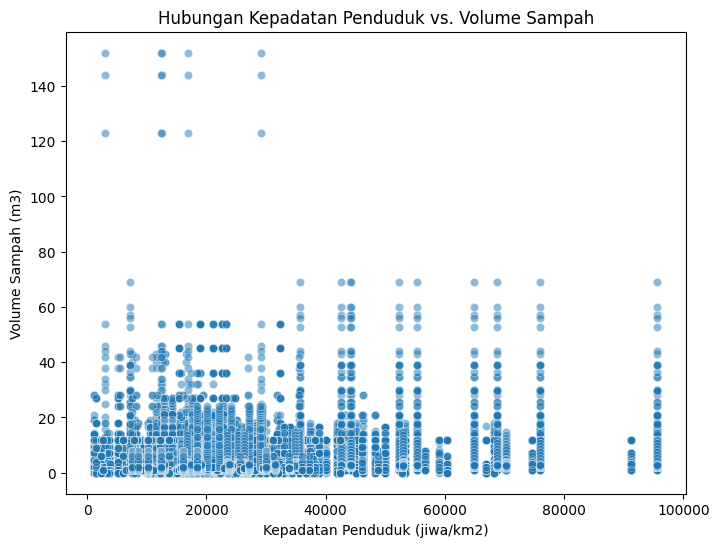

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["jumlah_kepadatan"], y=df["volume_sampah_perhari(m3)"], alpha=0.5)
plt.title("Hubungan Kepadatan Penduduk vs. Volume Sampah")
plt.xlabel("Kepadatan Penduduk (jiwa/km2)")
plt.ylabel("Volume Sampah (m3)")
plt.show()

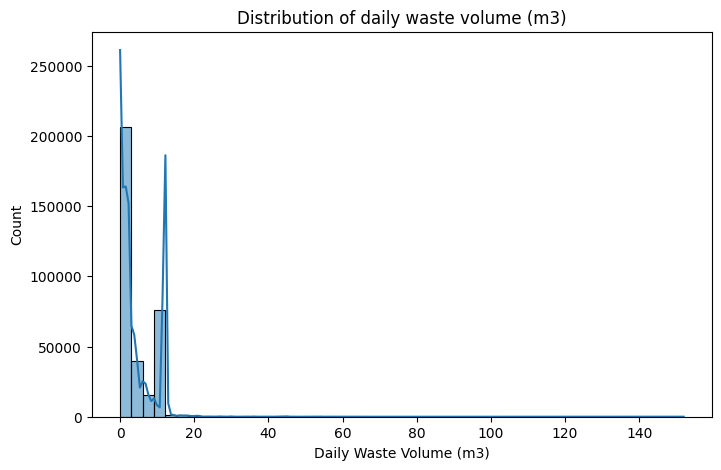

In [ ]:

plt.figure(figsize=(8,5))
sns.histplot(df["volume_sampah_perhari(m3)"], bins=50, kde=True)
plt.title("Distribution of daily waste volume (m3)")
plt.xlabel("Daily Waste Volume (m3)")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3902128755.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


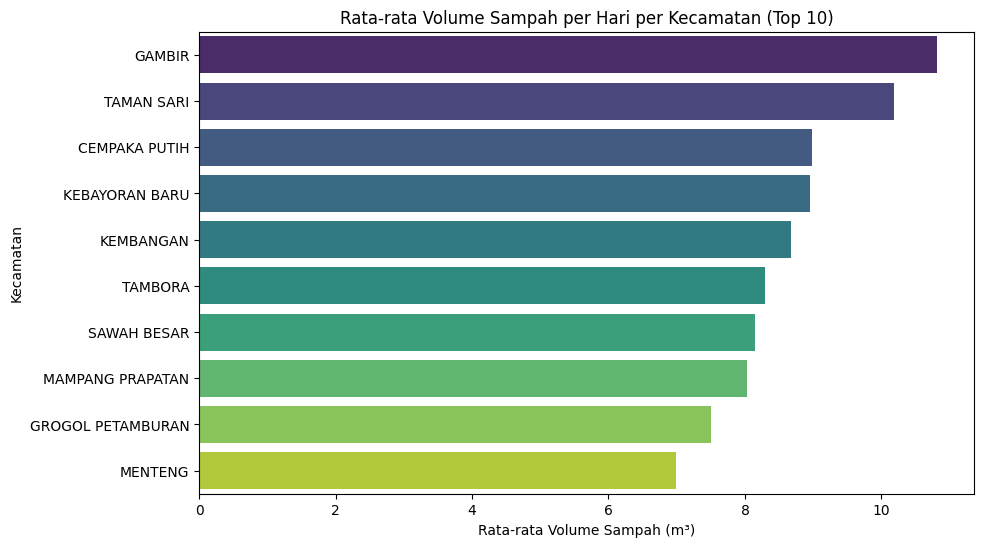

In [ ]:

# Hitung rata-rata volume sampah per kecamatan
avg_per_kecamatan = df.groupby("kecamatan")["volume_sampah_perhari(m3)"].mean().sort_values(ascending=False)

# Ambil top 10
top10 = avg_per_kecamatan.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.title("Rata-rata Volume Sampah per Hari per Kecamatan (Top 10)")
plt.xlabel("Rata-rata Volume Sampah (m³)")
plt.ylabel("Kecamatan")
plt.show()


In [ ]:
df.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,tanggal,volume_sampah_perhari(m3),tahun,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,45032,38142
1,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,26440,91155
2,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,22013,75900
3,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,46980,74538
4,1,Kali / Sungai Sentiong - Ruas Abapon,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,45032,38142


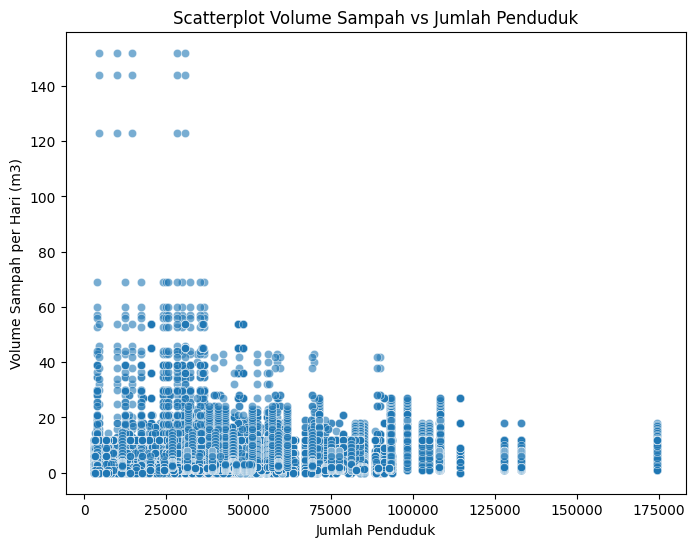

In [ ]:
# Scatterplot Volume vs Jumlah Penduduk
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="jumlah_penduduk_wni_wna", y="volume_sampah_perhari(m3)", alpha=0.6)
plt.title("Scatterplot Volume Sampah vs Jumlah Penduduk")
plt.xlabel("Jumlah Penduduk")
plt.ylabel("Volume Sampah per Hari (m3)")
plt.show()


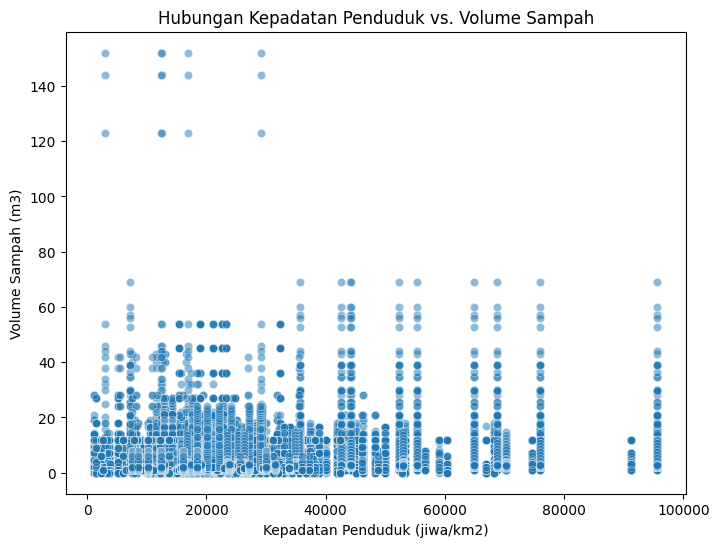

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["jumlah_kepadatan"], y=df["volume_sampah_perhari(m3)"], alpha=0.5)
plt.title("Hubungan Kepadatan Penduduk vs. Volume Sampah")
plt.xlabel("Kepadatan Penduduk (jiwa/km2)")
plt.ylabel("Volume Sampah (m3)")
plt.show()

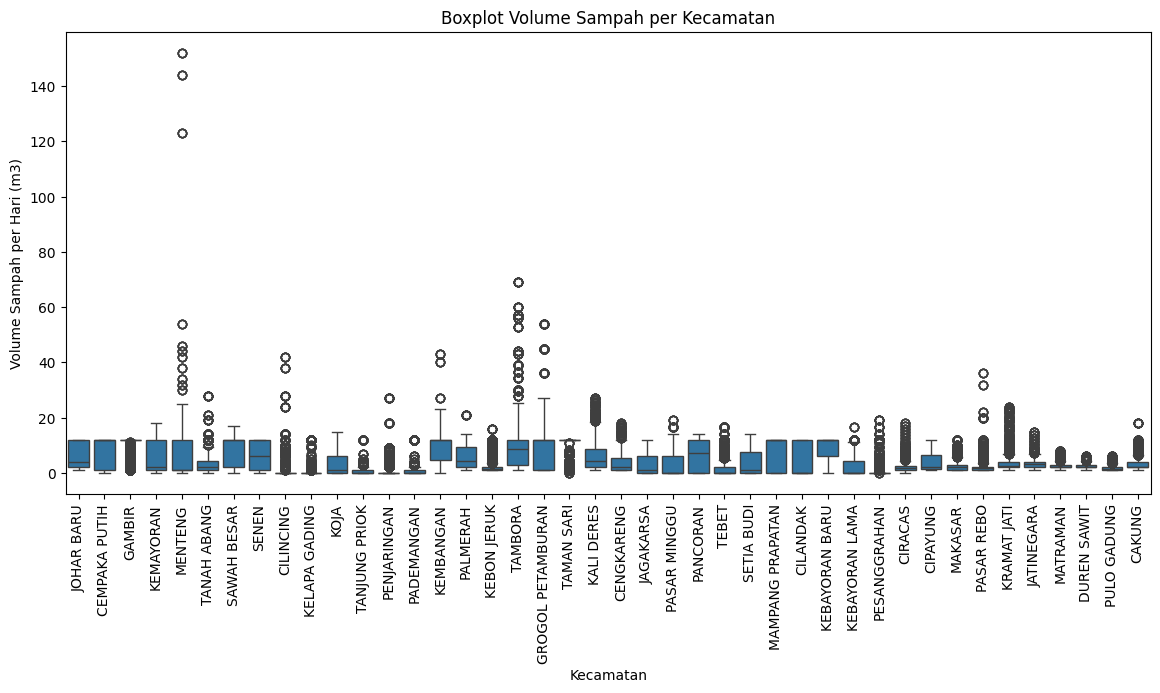

In [ ]:
# Boxplot Volume Sampah per Kecamatan
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="kecamatan", y="volume_sampah_perhari(m3)")
plt.xticks(rotation=90)
plt.title("Boxplot Volume Sampah per Kecamatan")
plt.xlabel("Kecamatan")
plt.ylabel("Volume Sampah per Hari (m3)")
plt.show()


# **PREPROCESSING DATA**

In [ ]:
print(df.isnull().sum())
df = df.dropna()

bulan                        0
titik_lokasi                 0
kecamatan                    0
wilayah                      0
panjang/luas                 0
tanggal                      0
volume_sampah_perhari(m3)    0
tahun                        0
jumlah_penduduk_wni_wna      0
jumlah_kepadatan             0
dtype: int64


In [ ]:
print(df.isnull().sum())   #
df = df.dropna()

bulan                        0
titik_lokasi                 0
kecamatan                    0
wilayah                      0
panjang/luas                 0
tanggal                      0
volume_sampah_perhari(m3)    0
tahun                        0
jumlah_penduduk_wni_wna      0
jumlah_kepadatan             0
dtype: int64


In [ ]:
df.head(34)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,tanggal,volume_sampah_perhari(m3),tahun,jumlah_penduduk_wni_wna,jumlah_kepadatan
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,45032,38142
1,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,26440,91155
2,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,22013,75900
3,1,Kali / Sungai Sentiong - Ruas Dewi Sri,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,46980,74538
4,1,Kali / Sungai Sentiong - Ruas Abapon,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,45032,38142
5,1,Kali / Sungai Sentiong - Ruas Abapon,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,26440,91155
6,1,Kali / Sungai Sentiong - Ruas Abapon,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,22013,75900
7,1,Kali / Sungai Sentiong - Ruas Abapon,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,46980,74538
8,1,Kali / Sungai Sentiong - JL Tanah Tinggi,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,45032,38142
9,1,Kali / Sungai Sentiong - JL Tanah Tinggi,JOHAR BARU,JAKARTA PUSAT,464.0,1,4.0,2022,26440,91155


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341093 entries, 0 to 341092
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   bulan                      341093 non-null  int64  
 1   titik_lokasi               341093 non-null  object 
 2   kecamatan                  341093 non-null  object 
 3   wilayah                    341093 non-null  object 
 4   panjang/luas               341093 non-null  float64
 5   tanggal                    341093 non-null  int64  
 6   volume_sampah_perhari(m3)  341093 non-null  float64
 7   tahun                      341093 non-null  int64  
 8   jumlah_penduduk_wni_wna    341093 non-null  int64  
 9   jumlah_kepadatan           341093 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 26.0+ MB


In [ ]:
df['volume_sampah_perhari(m3)'].describe()

,volume_sampah_perhari(m3)
count,341093.000000
mean,4.320299
std,4.964156
min,0.000000
25%,1.000000
50%,2.000000
75%,7.600000
max,152.000000


In [ ]:
df.to_csv("data_preprocess.csv", index=False)


# TRAIN TEST SPLIT


In [ ]:

X = df.drop('volume_sampah_perhari(m3)', axis=1)
y = df['volume_sampah_perhari(m3)']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape train/test:", X_train.shape, X_test.shape)

Shape train/test: (272874, 9) (68219, 9)


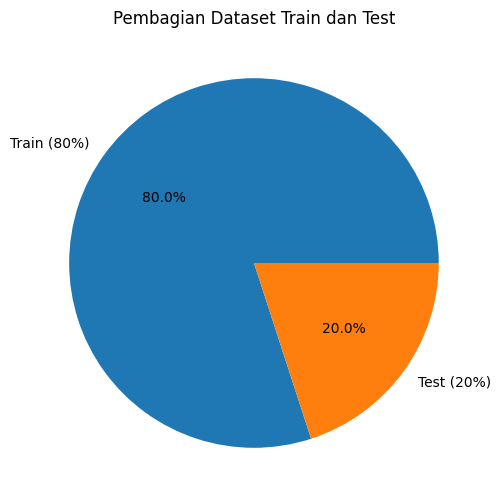

In [ ]:
sizes = [len(X_train), len(X_test)]
labels = ['Train (80%)', 'Test (20%)']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pembagian Dataset Train dan Test')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['wilayah', 'kecamatan', 'titik_lokasi']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    encoders[col] = le

In [ ]:
# Ambil 5 baris pertama
sample = X_train[categorical_cols].head(5)

print("=== Contoh data kategorikal SETELAH Label Encoding ===")
print(sample)


=== Contoh data kategorikal SETELAH Label Encoding ===
        wilayah  kecamatan  titik_lokasi
335614        0         37           123
238373        2         28           346
130440        3         11           696
97444         3         11           709
296703        3          0          1415


In [ ]:
for col, le in encoders.items():
    print(f"\nMapping LabelEncoder untuk kolom '{col}':")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for k, v in list(mapping.items())[:10]:   # tampilkan 10 contoh
        print(f"{k} -> {v}")



Mapping LabelEncoder untuk kolom 'wilayah':
JAKARTA BARAT -> 0
JAKARTA PUSAT -> 1
JAKARTA SELATAN -> 2
JAKARTA TIMUR -> 3
JAKARTA UTARA -> 4

Mapping LabelEncoder untuk kolom 'kecamatan':
CAKUNG -> 0
CEMPAKA PUTIH -> 1
CENGKARENG -> 2
CILANDAK -> 3
CILINCING -> 4
CIPAYUNG -> 5
CIRACAS -> 6
DUREN SAWIT -> 7
GAMBIR -> 8
GROGOL PETAMBURAN -> 9

Mapping LabelEncoder untuk kolom 'titik_lokasi':
Aliran Kali Baru Barat IISIP Lenteng Agung -> 0
Aliran Kali Baru Barat Jln. Joe -> 1
Aliran Kali Krukut Hulu Matoa - Brigif -> 2
Aliran Kali Krukut Jln. Aselih -> 3
Aliran Kali Sarua -> 4
Anak Kali Angke Kedaung Rw 008 -> 5
BKB RPTRA Kalijodo -> 6
Banjir Kanal Barat (Fly Over Tanah Abang - Fly Over Bongkaran Tanah Abang) -> 7
Banjir Kanal Barat (Fly Over Tanah Abang - Jembatan Jati Pulo) -> 8
Banjir Kanal Barat (Jembatan Gantung - Fly Over Tomang) -> 9


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = [
    'panjang/luas',
    'tanggal',
    'bulan',
    'tahun',
    'jumlah_penduduk_wni_wna',
    'jumlah_kepadatan'
]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]  = scaler.transform(X_test[numerical_cols])




In [ ]:
# sebelum scaling
X_train_before = X_train.copy()

# setelah scaling sudah ada di X_train
pd.concat(
    [X_train_before[numerical_cols].head(),
     X_train[numerical_cols].head()],
    axis=1,
    keys=['Sebelum Scaling', 'Sesudah Scaling']
)


Sebelum Scaling                                                \
          panjang/luas   tanggal bulan tahun jumlah_penduduk_wni_wna   
335614       -0.422560  1.676898   0.0   0.0               -1.164807   
238373        0.743051  0.670525   0.0   0.0               -0.780474   
130440       -0.347579 -0.447666   0.0   0.0               -0.158985   
97444        -0.074921 -0.783124   0.0   0.0               -0.153829   
296703       -0.074921  1.229621   0.0   0.0                1.987473   

                        Sesudah Scaling                        \
       jumlah_kepadatan    panjang/luas   tanggal bulan tahun   
335614         1.100705       -0.422560  1.676898   0.0   0.0   
238373         0.328046        0.743051  0.670525   0.0   0.0   
130440         0.800965       -0.347579 -0.447666   0.0   0.0   
97444          0.196355       -0.074921 -0.783124   0.0   0.0   
296703        -0.469005       -0.074921  1.229621   0.0   0.0   

                                                 
       jumlah_penduduk_wni_wna jumlah_kepadatan  
335614               -1.164807         1.100705  
238373               -0.780474         0.328046  
130440               -0.158985         0.800965  
97444                -0.153829         0.196355  
296703                1.987473        -0.469005

In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    y_true_np, y_pred_np = np.array(y_true), np.array(y_pred)
    non_zero = y_true_np != 0
    mape = np.mean(np.abs((y_true_np[non_zero] - y_pred_np[non_zero]) / y_true_np[non_zero])) * 100 if any(non_zero) else 0

    medae = median_absolute_error(y_true, y_pred)

    return {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape,
        'MedAE': medae
    }


TESTING

# REGRESI

In [ ]:
results = []


In [ ]:
# linear regresi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import numpy as np
import pandas as pd

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


y_pred_train_lr = lr.predict(X_train)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_lr)

print("\n=== R² Linear Regression ===")
print(f"R² Train : {r2_train_lr}")
print(f"R² Test  : {r2_test_lr}")

# Evaluasi dan tambah ke results
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))

lr_result = evaluate_model("Linear Regression", y_test, y_pred_lr)

print("\n=== Hasil Evaluasi Linear Regression ===")
print(pd.DataFrame([lr_result]).to_string(index=False))



=== R² Linear Regression ===
R² Train : 0.25185737776588013
R² Test  : 0.24757542919126152

=== Hasil Evaluasi Linear Regression ===
            Model      MAE     RMSE       R²       MAPE    MedAE
Linear Regression 3.267703 4.313382 0.247575 128.373551 2.953416


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Decision Tree dengan tuning max_depth dan min_samples_split
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

dt_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_params,
    n_iter=5,
    cv=3,
    random_state=42
)

dt_search.fit(X_train, y_train)

best_dt = dt_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluasi dan simpan ke results
dt_result = evaluate_model("Decision Tree", y_test, y_pred_dt)
results.append(dt_result)

# Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi Decision Tree ===")
print(pd.DataFrame([dt_result]).to_string(index=False))

# Tampilkan best parameters
print(f"Best parameters untuk Decision Tree: {dt_search.best_params_}")

# Cek performa train dan test
r2_train_dt = best_dt.score(X_train, y_train)
r2_test_dt = best_dt.score(X_test, y_test)

print("\n=== R² Decision Tree ===")
print("R² Train :", r2_train_dt)
print("R² Test  :", r2_test_dt)



=== Hasil Evaluasi Decision Tree ===
        Model      MAE     RMSE      R²      MAPE  MedAE
Decision Tree 0.301309 1.522227 0.90629 10.000565    0.0
Best parameters untuk Decision Tree: {'min_samples_split': 5, 'max_depth': None}

=== R² Decision Tree ===
R² Train : 0.9836249972908823
R² Test  : 0.906290040333712


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd



# Random Forest dengan tuning n_estimators, max_depth, dan min_samples_split
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, n_iter=5, cv=3, random_state=42)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluasi dan simpan ke results
rf_result = evaluate_model("Random Forest", y_test, y_pred_rf)
results.append(rf_result)

# Tampilkan hasil hanya untuk Random Forest
print("\n=== Hasil Evaluasi Random Forest ===")
print(pd.DataFrame([rf_result]).to_string(index=False))

# Tampilkan best parameters
print(f"Best parameters untuk Random Forest: {rf_search.best_params_}")




=== Hasil Evaluasi Random Forest ===
        Model      MAE     RMSE       R²      MAPE   MedAE
Random Forest 0.885494 1.797816 0.869287 32.580945 0.25193
Best parameters untuk Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd


# Gradient Boosting dengan tuning n_estimators, max_depth, dan learning_rate
gb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}
gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_params, n_iter=5, cv=3, random_state=42)
gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Evaluasi dan simpan ke results
gb_result = evaluate_model("Gradient Boosting", y_test, y_pred_gb)
results.append(gb_result)

# Tampilkan hasil hanya untuk Gradient Boosting
print("\n=== Hasil Evaluasi Gradient Boosting ===")
print(pd.DataFrame([gb_result]).to_string(index=False))

# Tampilkan best parameters
print(f"Best parameters untuk Gradient Boosting: {gb_search.best_params_}")

# Cek overfitting
print("Gradient Boosting R² train:", best_gb.score(X_train, y_train))
print("Gradient Boosting R² test:", best_gb.score(X_test, y_test))


=== Hasil Evaluasi Gradient Boosting ===
            Model      MAE    RMSE       R²      MAPE    MedAE
Gradient Boosting 1.634285 2.49293 0.748668 63.264072 0.903177
Best parameters untuk Gradient Boosting: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
Gradient Boosting R² train: 0.7748383051953311
Gradient Boosting R² test: 0.7486683805214176


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


# Stacking dengan model terbaik (Decision Tree, Random Forest, Gradient Boosting)
estimators = [
    ('dt', DecisionTreeRegressor(max_depth=None, min_samples_split=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42))

]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

# Evaluasi dan simpan ke results
stack_result = evaluate_model("Stacking", y_test, y_pred_stack)
results.append(stack_result)

# Tampilkan hasil hanya untuk Stacking
print("\n=== Hasil Evaluasi Stacking ===")
print(pd.DataFrame([stack_result]).to_string(index=False))

# Cek overfitting
print("Stacking R² train:", stacking_model.score(X_train, y_train))
print("Stacking R² test:", stacking_model.score(X_test, y_test))


=== Hasil Evaluasi Stacking ===
   Model      MAE     RMSE       R²      MAPE    MedAE
Stacking 0.574604 1.446806 0.915346 20.711791 0.166861
Stacking R² train: 0.975671479030663
Stacking R² test: 0.9153460039511379


In [ ]:
print(list(X_train.columns))


['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas', 'tanggal', 'tahun', 'jumlah_penduduk_wni_wna', 'jumlah_kepadatan']


In [ ]:
feature_order = X_train.columns.tolist()
print(feature_order)


['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas', 'tanggal', 'tahun', 'jumlah_penduduk_wni_wna', 'jumlah_kepadatan']


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd


# Ridge Regression dengan tuning alpha
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_search = RandomizedSearchCV(Ridge(random_state=42), ridge_params, n_iter=5, cv=3, random_state=42)
ridge_search.fit(X_train, y_train)
best_ridge = ridge_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Evaluasi dan simpan ke results
ridge_result = evaluate_model("Ridge Regression", y_test, y_pred_ridge)
results.append(ridge_result)


print("\n=== Hasil Evaluasi Ridge Regression ===")
print(pd.DataFrame([ridge_result]).to_string(index=False))


print(f"Best alpha untuk Ridge: {ridge_search.best_params_['alpha']}")

# Cek performa train dan test
r2_train_ridge = best_ridge.score(X_train, y_train)
r2_test_ridge = best_ridge.score(X_test, y_test)

print("\n=== R² Ridge Regression ===")
print("R² Train :", r2_train_ridge)
print("R² Test  :", r2_test_ridge)


=== Hasil Evaluasi Ridge Regression ===
           Model      MAE     RMSE       R²       MAPE    MedAE
Ridge Regression 3.267706 4.313382 0.247575 128.373048 2.953431
Best alpha untuk Ridge: 10.0

=== R² Ridge Regression ===
R² Train : 0.25185737767609795
R² Test  : 0.2475754624183979


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd


# Lasso Regression dengan tuning alpha
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_search = RandomizedSearchCV(Lasso(random_state=42), lasso_params, n_iter=5, cv=3, random_state=42)
lasso_search.fit(X_train, y_train)
best_lasso = lasso_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

# Evaluasi dan simpan ke results
lasso_result = evaluate_model("Lasso Regression", y_test, y_pred_lasso)
results.append(lasso_result)

# Tampilkan hasil hanya untuk Lasso
print("\n=== Hasil Evaluasi Lasso Regression ===")
print(pd.DataFrame([lasso_result]).to_string(index=False))

# Tampilkan best alpha
print(f"Best alpha untuk Lasso: {lasso_search.best_params_['alpha']}")

# Cek performa train dan test
r2_train_lasso = best_lasso.score(X_train, y_train)
r2_test_lasso = best_lasso.score(X_test, y_test)

print("\n=== R² Lasso Regression ===")
print("R² Train :", r2_train_lasso)
print("R² Test  :", r2_test_lasso)



=== Hasil Evaluasi Lasso Regression ===
           Model      MAE     RMSE       R²       MAPE    MedAE
Lasso Regression 3.267753 4.313385 0.247575 128.360532 2.952529
Best alpha untuk Lasso: 0.001

=== R² Lasso Regression ===
R² Train : 0.2518571931160818
R² Test  : 0.2475745474931199


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd


# KNN dengan tuning n_neighbors dan weights
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_search = RandomizedSearchCV(KNeighborsRegressor(), knn_params, n_iter=4, cv=3, random_state=42)
knn_search.fit(X_train, y_train)
best_knn = knn_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluasi dan simpan ke results
knn_result = evaluate_model("KNN", y_test, y_pred_knn)
results.append(knn_result)

# Tampilkan hasil hanya untuk KNN
print("\n=== Hasil Evaluasi KNN ===")
print(pd.DataFrame([knn_result]).to_string(index=False))

# Tampilkan best parameters
print(f"Best parameters untuk KNN: {knn_search.best_params_}")

# Cek performa train dan test
r2_train_knn = best_knn.score(X_train, y_train)
r2_test_knn = best_knn.score(X_test, y_test)

print("\n=== R² KNN ===")
print("R² Train :", r2_train_knn)
print("R² Test  :", r2_test_knn)


=== Hasil Evaluasi KNN ===
Model      MAE     RMSE       R²      MAPE    MedAE
  KNN 1.920172 3.242227 0.574878 73.301345 0.909975
Best parameters untuk KNN: {'weights': 'distance', 'n_neighbors': 9}

=== R² KNN ===
R² Train : 1.0
R² Test  : 0.5748777315055866


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd



# XGBoost dengan tuning n_estimators, max_depth, dan learning_rate
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1]
}
xgb_search = RandomizedSearchCV(xgb.XGBRegressor(random_state=42), xgb_params, n_iter=5, cv=3, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluasi dan simpan ke results
xgb_result = evaluate_model("XGBoost", y_test, y_pred_xgb)
results.append(xgb_result)

# Tampilkan hasil hanya untuk XGBoost
print("\n=== Hasil Evaluasi XGBoost ===")
print(pd.DataFrame([xgb_result]).to_string(index=False))

# Tampilkan best parameters
print(f"Best parameters untuk XGBoost: {xgb_search.best_params_}")

# Cek overfitting
print("XGBoost R² train:", best_xgb.score(X_train, y_train))
print("XGBoost R² test:", best_xgb.score(X_test, y_test))


=== Hasil Evaluasi XGBoost ===
  Model      MAE     RMSE      R²      MAPE    MedAE
XGBoost 1.671843 2.582275 0.73033 64.103551 0.906299
Best parameters untuk XGBoost: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
XGBoost R² train: 0.7615912535144805
XGBoost R² test: 0.7303303451450346


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd


# LightGBM dengan tuning n_estimators, max_depth, dan learning_rate
lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1]
}
lgb_search = RandomizedSearchCV(lgb.LGBMRegressor(random_state=42), lgb_params, n_iter=5, cv=3, random_state=42)
lgb_search.fit(X_train, y_train)
best_lgb = lgb_search.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)

# Evaluasi dan simpan ke results
lgb_result = evaluate_model("LightGBM", y_test, y_pred_lgb)
results.append(lgb_result)

# Tampilkan hasil hanya untuk LightGBM
print("\n=== Hasil Evaluasi LightGBM ===")
print(pd.DataFrame([lgb_result]).to_string(index=False))

# Tampilkan best parameters
print(f"Best parameters untuk LightGBM: {lgb_search.best_params_}")

# Cek overfitting
print("LightGBM R² train:", best_lgb.score(X_train, y_train))
print("LightGBM R² test:", best_lgb.score(X_test, y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 181916, number of used features: 7
[LightGBM] [Info] Start training from score 4.335401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 181916, number of used features: 7
[LightGBM] [Info] Start training from score 4.328805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 181916, number of used features: 7
[LightGBM] [Info] Start tra

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd




# CatBoost dengan tuning iterations, depth, dan learning_rate
cat_params = {
    'iterations': [100, 200],
    'depth': [9, 15, 22],
    'learning_rate': [0.01, 0.1]
}
cat_search = RandomizedSearchCV(CatBoostRegressor(random_state=42, verbose=0), cat_params, n_iter=5, cv=3, random_state=42)
cat_search.fit(X_train, y_train)
best_cat = cat_search.best_estimator_
y_pred_cat = best_cat.predict(X_test)

# Evaluasi dan simpan ke results
cat_result = evaluate_model("CatBoost", y_test, y_pred_cat)
results.append(cat_result)

# Tampilkan hasil hanya untuk CatBoost
print("\n=== Hasil Evaluasi CatBoost ===")
print(pd.DataFrame([cat_result]).to_string(index=False))

# Tampilkan best parameters
print(f"Best parameters untuk CatBoost: {cat_search.best_params_}")

# Cek overfitting
print("CatBoost R² train:", best_cat.score(X_train, y_train))
print("CatBoost R² test:", best_cat.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


=== Hasil Evaluasi CatBoost ===
   Model      MAE     RMSE       R²      MAPE    MedAE
CatBoost 2.059008 3.020627 0.631004 78.092411 1.301295
Best parameters untuk CatBoost: {'learning_rate': 0.1, 'iterations': 100, 'depth': 15}
CatBoost R² train: 0.6490770907837555
CatBoost R² test: 0.6310043133813599


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np


# ======== 1. Build Model ========
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


# ======== 2. Early Stopping ========
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


# ======== 3. Training Model ========
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# ======== 4. Prediksi ========
y_pred_ann = model.predict(X_test).flatten()


# ======== 5. Evaluasi Model ========
ann_result = evaluate_model("ANN Keras", y_test, y_pred_ann)
results.append(ann_result)

print("\n=== Hasil Evaluasi ANN Keras ===")
print(pd.DataFrame([ann_result]).to_string(index=False))


# ======== 6. Cek Overfitting ========
y_pred_train = model.predict(X_train).flatten()

print("\n=== Cek Overfitting (R² Score) ===")
print("ANN Keras R² train:", r2_score(y_train, y_pred_train))
print("ANN Keras R² test :", r2_score(y_test, y_pred_ann))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 69.1923 - val_loss: 18.4378
Epoch 2/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 18.8517 - val_loss: 17.8622
Epoch 3/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 17.9837 - val_loss: 18.5996
Epoch 4/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 18.1038 - val_loss: 17.4428
Epoch 5/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 17.3519 - val_loss: 18.7374
Epoch 6/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 17.4010 - val_loss: 17.7814
Epoch 7/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 17.4658 - val_loss: 18.0359
Epoch 8/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 17.3909 - val_loss: 17.7295
Epoch 9/50
6822/6822 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 17.6183 - val_loss: 17.7540
2132/2132 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

=== Hasil Evaluasi ANN Keras ===
    Model      MAE     RMSE      R²      MAPE    MedAE
ANN Keras 3.187294 4.167561 0.29759 120.27786 2.6

In [ ]:
from sklearn.svm import LinearSVR
# Gunakan subset data untuk tuning agar lebih cepat (opsional)
subset_size = int(0.1 * len(X_train))  # 10% data train (~17.9k)
subset_indices = np.random.choice(len(X_train), subset_size, replace=False)
X_train_subset = X_train.iloc[subset_indices] if isinstance(X_train, pd.DataFrame) else X_train[subset_indices]
y_train_subset = y_train.iloc[subset_indices] if isinstance(y_train, pd.Series) else y_train[subset_indices]

svr_params = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1]}
svr_search = RandomizedSearchCV(LinearSVR(random_state=42), svr_params, n_iter=5, cv=3, random_state=42)
svr_search.fit(X_train_subset, y_train_subset)
best_svr = svr_search.best_estimator_
best_svr.fit(X_train, y_train)
y_pred_svr = best_svr.predict(X_test)
svr_result = evaluate_model("SVR", y_test, y_pred_svr)
results.append(svr_result)
print("\n=== Hasil Evaluasi SVR ===")
print(pd.DataFrame([svr_result]).to_string(index=False))
print(f"Best parameters untuk SVR: {svr_search.best_params_}")
print("SVR R² train:", best_svr.score(X_train, y_train))
print("SVR R² test:", r2_score(y_test, y_pred_svr))

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w


=== Hasil Evaluasi SVR ===
Model      MAE     RMSE       R²       MAPE    MedAE
  SVR 3.444835 4.397456 0.217958 127.769832 3.013434
Best parameters untuk SVR: {'epsilon': 0.1, 'C': 0.1}
SVR R² train: 0.2229845822003973
SVR R² test: 0.2179580793402791


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Statistical Tests dan Confidence Intervals

In [ ]:
from scipy.stats import ttest_rel, wilcoxon
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Pastikan fungsi evaluate_model ada
def evaluate_model(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 if not np.any(y_test == 0) else np.inf
    medae = np.median(np.abs(y_test - y_pred))
    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R²': r2, 'MAPE': mape, 'MedAE': medae}

# Konversi y_test ke numpy array untuk menghindari KeyError
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

# Kumpulkan y_pred dari semua model
models = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgb,
    "CatBoost": y_pred_cat,
    "ANN Keras": y_pred_ann,
    "LinearSVR": y_pred_svr
}

# Bootstrap CI untuk MAE
def bootstrap_ci(y_true, y_pred, n_boot=2000):
    rng = np.random.default_rng(42)
    boots = []
    for _ in range(n_boot):
        idx = rng.integers(0, len(y_true), len(y_true))
        boots.append(mean_absolute_error(y_true[idx], y_pred[idx]))
    return np.percentile(boots, [2.5, 97.5])

# Tabel metrics dengan CI
rows = []
for name, y_pred in models.items():
    mae = mean_absolute_error(y_test_np, y_pred)
    mae_ci = bootstrap_ci(y_test_np, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_np, y_pred))
    r2 = r2_score(y_test_np, y_pred)
    rows.append({
        "Model": name,
        "MAE": mae,
        "MAE 95% CI": f"[{mae_ci[0]:.3f}, {mae_ci[1]:.3f}]",
        "RMSE": rmse,
        "R²": r2
    })

df_results = pd.DataFrame(rows).sort_values("R²", ascending=False)
print("\n=== Metrics with 95% CI ===")
print(df_results.to_string(index=False))

# Pairwise statistical tests (pada absolute error)
def holm_bonferroni(pvals, alpha=0.05):
    m = len(pvals)
    order = np.argsort(pvals)
    decisions = [False]*m
    for k, idx in enumerate(order):
        if pvals[idx] <= alpha/(m - k):
            decisions[idx] = True
        else:
            break
    return decisions

pairs = list(combinations(models.keys(), 2))
tt_results = []
for a, b in pairs:
    ea_abs = np.abs(y_test_np - models[a])
    eb_abs = np.abs(y_test_np - models[b])
    t_stat, p_t = ttest_rel(ea_abs, eb_abs)
    w_stat, p_w = wilcoxon(ea_abs, eb_abs)
    tt_results.append({
        "Pair": f"{a} vs {b}",
        "ΔMAE (a-b)": float(np.mean(ea_abs - eb_abs)),
        "t-test p": float(p_t),
        "Wilcoxon p": float(p_w)
    })

tt_df = pd.DataFrame(tt_results)
tt_df["Holm sig (t-test)"] = holm_bonferroni(tt_df["t-test p"].values)
tt_df["Holm sig (Wilcoxon)"] = holm_bonferroni(tt_df["Wilcoxon p"].values)
print("\n=== Pairwise Significance Tests ===")
print(tt_df.to_string(index=False))


=== Metrics with 95% CI ===
            Model      MAE     MAE 95% CI     RMSE       R²
    Decision Tree 0.301309 [0.290, 0.313] 1.522227 0.906290
    Random Forest 0.885494 [0.874, 0.897] 1.797816 0.869287
Gradient Boosting 1.634285 [1.620, 1.649] 2.492930 0.748668
          XGBoost 1.671843 [1.656, 1.686] 2.582275 0.730330
         CatBoost 2.059008 [2.043, 2.076] 3.020627 0.631004
         LightGBM 2.123072 [2.106, 2.140] 3.108686 0.609176
              KNN 1.920172 [1.901, 1.940] 3.242227 0.574878
        ANN Keras 3.187294 [3.168, 3.208] 4.167561 0.297590
 Ridge Regression 3.267706 [3.248, 3.289] 4.313382 0.247575
Linear Regression 3.267703 [3.248, 3.289] 4.313382 0.247575
 Lasso Regression 3.267753 [3.248, 3.289] 4.313385 0.247575
        LinearSVR 3.444835 [3.425, 3.465] 4.397456 0.217958

=== Pairwise Significance Tests ===
                                  Pair  ΔMAE (a-b)      t-test p    Wilcoxon p  Holm sig (t-test)  Holm sig (Wilcoxon)
 Linear Regression vs Ridge Regress

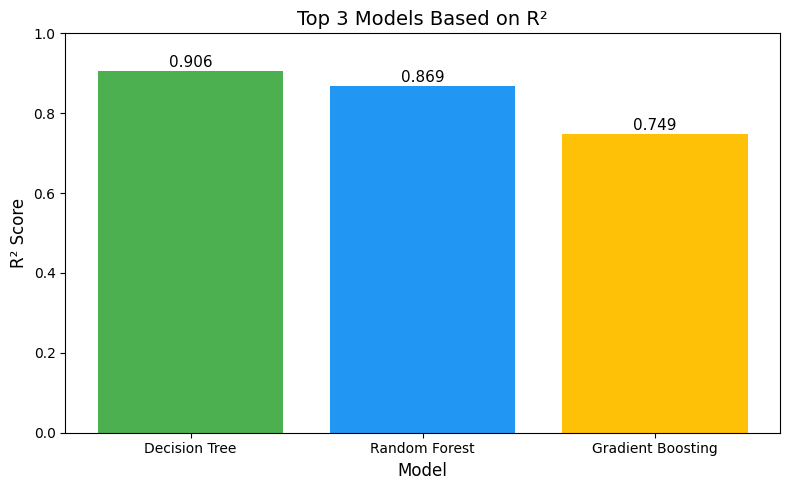

In [ ]:
import matplotlib.pyplot as plt

# --- Ambil top 3 model berdasarkan R² ---
top3 = df_results.nlargest(3, 'R²')

# --- Plot bar chart ---
plt.figure(figsize=(8, 5))
bars = plt.bar(top3['Model'], top3['R²'], color=['#4CAF50', '#2196F3', '#FFC107'])
plt.title('Top 3 Models Based on R²', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.ylim(0, 1)

# Tambahkan nilai R² di atas bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.01,
             f"{bar.get_height():.3f}",
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()


Feature Importance


=== Feature Importance ===
                   Feature  Importance
5                  tanggal    0.259266
3                  wilayah    0.247697
1             titik_lokasi    0.218800
2                kecamatan    0.112931
4             panjang/luas    0.077398
7  jumlah_penduduk_wni_wna    0.071403
8         jumlah_kepadatan    0.012506
0                    bulan    0.000000
6                    tahun    0.000000


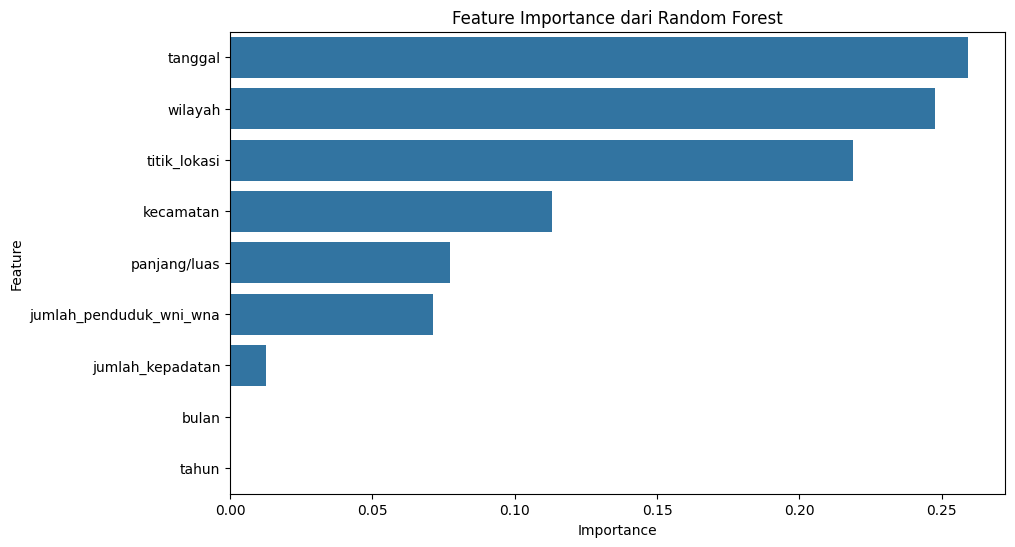

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Feature importance untuk Random Forest
best_rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
best_rf.fit(X_train, y_train)
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print("\n=== Feature Importance ===")
print(importances)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance dari Random Forest')
plt.show()

Stacking Model TOP 3

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import LinearSVR

baseline_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "Linear SVR": LinearSVR()
}

baseline_results = []

for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = evaluate_model(name, y_test, y_pred)
    baseline_results.append(result)

import pandas as pd
baseline_df = pd.DataFrame(baseline_results)
print("\n=== Hasil Evaluasi Baseline ===")
print(baseline_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 272874, number of used features: 7
[LightGBM] [Info] Start training from score 4.324329

=== Hasil Evaluasi Baseline ===
                Model       MAE      RMSE        R²  MAPE     MedAE
0   Linear Regression  3.267703  4.313382  0.247575   inf  2.953416
1    Ridge Regression  3.267704  4.313382  0.247575   inf  2.953418
2    Lasso Regression  3.491769  4.448822  0.199582   inf  2.864690
3                 KNN  1.937195  3.302833  0.558836   inf  0.880000
4       Decision Tree  0.239279  1.482894  0.911070   inf  0.000000
5       Random Forest  0.564670  1.428599  0.917463   inf  0.089600
6   Gradient Boosting  2.644254  3.678308  0.452829   inf  2.051138
7             XGBoost  1.978108  2.964052  0.644697   inf  1.199905
8            

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import joblib

joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(encoders, 'label_encoders.pkl')   # LabelEncoder dict
joblib.dump(scaler, 'scaler.pkl')              # <- INI YANG BENAR
joblib.dump(categorical_cols, 'categorical_cols.pkl')
joblib.dump(numerical_cols, 'numerical_cols.pkl')


['numerical_cols.pkl']

TABEL HASIL

In [ ]:
df_final = pd.DataFrame(results).sort_values("R²", ascending=False)
print("\n=== Final Comparison Table (12 Models + Stacking) ===")
print(df_final.to_string(index=False))

# Export ke CSV untuk jurnal
df_final.to_csv('final_model_comparison.csv', index=False)
print("\nTabel diekspor ke 'final_model_comparison.csv' untuk jurnal.")


=== Final Comparison Table (12 Models + Stacking) ===
            Model      MAE     RMSE       R²       MAPE    MedAE
         Stacking 0.574604 1.446806 0.915346  20.711791 0.166861
    Decision Tree 0.301309 1.522227 0.906290  10.000565 0.000000
    Random Forest 0.885494 1.797816 0.869287  32.580945 0.251930
Gradient Boosting 1.634285 2.492930 0.748668  63.264072 0.903177
          XGBoost 1.671843 2.582275 0.730330  64.103551 0.906299
         CatBoost 2.059008 3.020627 0.631004  78.092411 1.301295
         LightGBM 2.123072 3.108686 0.609176  80.635561 1.357019
              KNN 1.920172 3.242227 0.574878  73.301345 0.909975
        ANN Keras 3.187294 4.167561 0.297590 120.277860 2.649626
 Ridge Regression 3.267706 4.313382 0.247575 128.373048 2.953431
Linear Regression 3.267703 4.313382 0.247575 128.373551 2.953416
 Lasso Regression 3.267753 4.313385 0.247575 128.360532 2.952529
              SVR 3.444835 4.397456 0.217958 127.769832 3.013434

Tabel diekspor ke 'final_model_com

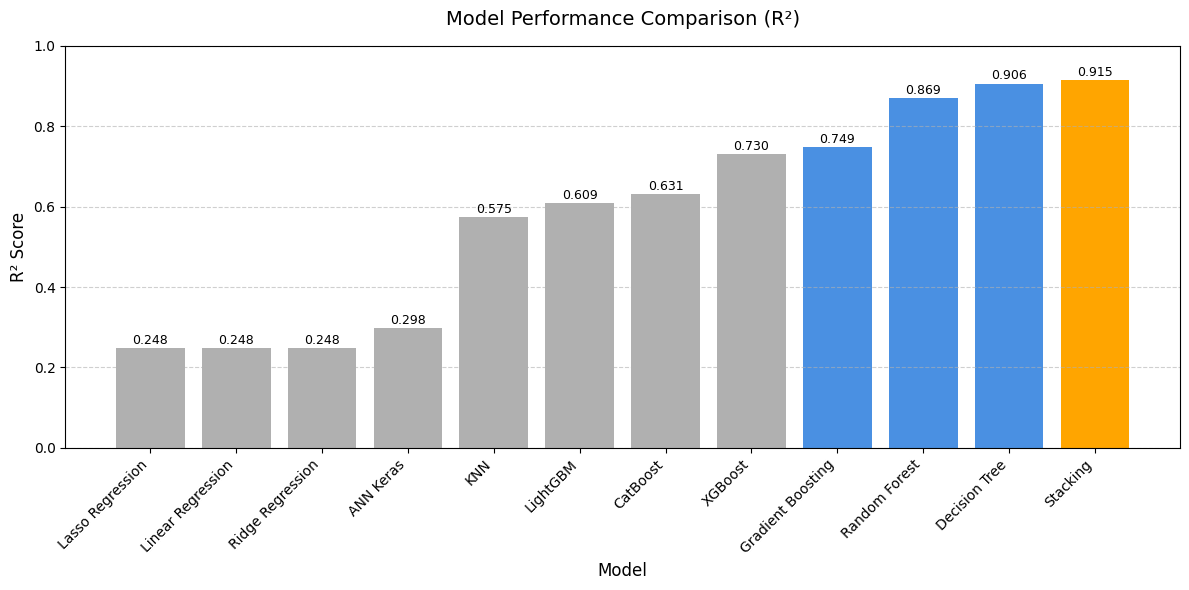

In [ ]:
import matplotlib.pyplot as plt


df_all = pd.concat([df_results, pd.DataFrame([stack_result])], ignore_index=True)


df_all = df_all[df_all["Model"] != "LinearSVR"].reset_index(drop=True)


df_all = df_all.sort_values("R²", ascending=True).reset_index(drop=True)


colors = []
for m in df_all["Model"]:
    if m in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
        colors.append("#4A90E2")  # biru muda (Top 3)
    elif m == "Stacking":
        colors.append("#FFA500")  # oranye terang (Stacking)
    else:
        colors.append("#B0B0B0")  # abu-abu lembut (Model umum)

# --- Plot bar chart ---
plt.figure(figsize=(12, 6))
bars = plt.bar(df_all["Model"], df_all["R²"], color=colors)
plt.title("Model Performance Comparison (R²)", fontsize=14, pad=15)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.01,
             f"{bar.get_height():.3f}",
             ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


VISUALISASI HASIL

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_stack, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Volume Sampah (m³)')
plt.ylabel('Predicted Volume Sampah (m³)')
plt.title('Stacking Ensemble: Actual vs Predicted')
plt.show()

: Transfer Model dan Preprocessors dan uji kode lainnya

In [ ]:

for col, encoder in label_encoders.items():
    print(f"Valid values for {col}:", encoder.classes_)

NameError: name 'label_encoders' is not defined

In [ ]:

print("Mapping kecamatan:", dict(zip(label_encoders['kecamatan'].classes_, range(len(label_encoders['kecamatan'].classes_)))))
print("Mapping wilayah:", dict(zip(label_encoders['wilayah'].classes_, range(len(label_encoders['wilayah'].classes_)))))

In [ ]:
print(X.columns)


In [ ]:
print("Statistik target y_train:", y_train.describe())
print("Statistik target y_test:", y_test.describe())

In [ ]:
# === 1. Predicted vs Actual Plot ===
plt.figure(figsize=(14, 6))

# Plot untuk Stacking
plt.scatter(y_test, y_pred_stack, alpha=0.6, label="Stacking", color="blue")

# Plot untuk Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color="green")

# Plot untuk ANN
plt.scatter(y_test, y_pred_ann, alpha=0.6, label="ANN", color="red")

# Line Perfect Fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.title("Predicted vs Actual (Stacking vs RF vs ANN)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

residuals_stacking = y_test - y_pred_stack
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(14, 6))

# Histogram residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_stacking, bins=30, color="blue", label="Stacking", kde=True, alpha=0.6)
sns.histplot(residuals_rf, bins=30, color="green", label="Random Forest", kde=True, alpha=0.6)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()

# Boxplot residuals
plt.subplot(1, 2, 2)
sns.boxplot(data=[residuals_stacking, residuals_rf], palette=["blue", "green"])
plt.xticks([0, 1], ["Stacking", "Random Forest"])
plt.title("Residuals Spread (Boxplot)")

plt.tight_layout()
plt.show()

In [ ]:
for col in df.columns:
    print(f"{col}:")
    print("  contoh:", df[col].iloc[:5].tolist())
    print("  unique:", df[col].unique())
    print()
